In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import math
import random
from scipy.stats import norm
import scipy
import sys
import graph as gr
import seaborn as sns
from collections import deque
from sys import maxsize as INT_MAX

In [2]:
sys.setrecursionlimit(10000)

# Part 7

## create datasets 
* #### number of sinulations = 1000
* #### n = 100
* #### average degree = 24

In [3]:
number_of_simulation = 1000

#### er greph

In [4]:
# generate 1000 er graph

n = 100
p = 0.24

er_graphs = [] # ER graph dataset
degree_mean = 0
for i in range(number_of_simulation):
    er = nx.gnp_random_graph(n, p)
    er_graphs.append(er)
    
    degrees = [d for n, d in er.degree()]
    degree_mean += sum(degrees)

print(f"average degree is {degree_mean/(len(degrees)*number_of_simulation)}")          

average degree is 23.75088


#### sf graph

In [5]:
# generate 1000 sf graph

n = 100 # if we goes n to infinity the average degree will be 2*m
m = 14

sf_graphs = [] # ER graph dataset
degree_mean = 0
for i in range(number_of_simulation):
    sf = nx.barabasi_albert_graph(n, m)
    sf_graphs.append(sf)
    
    degrees = [d for n, d in sf.degree()]
    degree_mean += sum(degrees)
    
print(f"average degree is {degree_mean/(len(degrees)*number_of_simulation)}")              
    

average degree is 24.08


#### watts strogatz graph

In [6]:
n = 100
k = 24 # average degree
p = 0.5

wa_graphs = [] # WA graph dataset
degree_mean = 0

for i in range (number_of_simulation):
    wa = nx.watts_strogatz_graph(n, k, p)
    wa_graphs.append(wa)
    
    degrees = [d for n, d in wa.degree()]
    degree_mean += sum(degrees)

print(f"average degree is {degree_mean/(len(degrees)*number_of_simulation)}")              

average degree is 24.0


#### RSRBG graph

In [7]:
n = 100
d1 = 30
d2 = 20

rsrbg_graphs = [] # rsrbg graph dataset
degree_mean = 0

for i in range (number_of_simulation):
    rsrbg = gr.RSRBG(n, d1, d2)
    rsrbg_graphs.append(rsrbg[0])
    
    degrees = [d for n, d in rsrbg[0].degree()]
    degree_mean += sum(degrees)

print(f"average degree is {degree_mean/(len(degrees)*number_of_simulation)}") 

average degree is 24.0


#### RSRG graph

In [8]:
n = 100
d1 = 30
d2 = 20
p = 0.6

rsrg_graphs = [] # rsrg graph dataset
degree_mean = 0

for i in range (number_of_simulation):
    rsrg = gr.RSRG(p, n, d1, d2)
    rsrg_graphs.append(rsrg[0])
    
    degrees = [d for n, d in rsrg[0].degree()]
    degree_mean += sum(degrees)

print(f"average degree is {degree_mean/(len(degrees)*number_of_simulation)}") 

average degree is 14.3899


# Compare girth of graphs

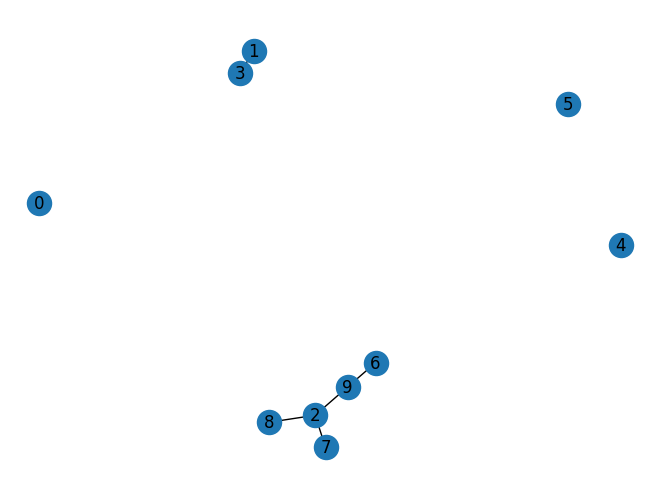

9223372036854775807


In [9]:
def girth(graph, base=0, mapping=None):
    ans = INT_MAX
    n = graph.number_of_nodes()
    
    for i in range(base, n+base):
        dist = [int(1e9)] * (n+base)
        par = [-1] * (n+base)
        dist[i] = 0
        
        q = deque()
          
        q.append(i)
            
        while q:
            x = q[0]
            q.popleft()
            
            y = x
            if mapping:
                y = mapping[x]
                
            for child in graph.neighbors(y):
                if mapping:
                    child = mapping[child]
                    
                if dist[child] == int(1e9):
                    dist[child] = 1 + dist[x]
                    par[child] = x
                    q.append(child)
             
                elif par[x] != child and par[child] != x:
                    ans = min(ans, dist[x] + dist[child] + 1)
                    
    return ans

# test girth function
g = nx.gnp_random_graph(10, 0.15)
nx.draw(g, with_labels=True)
plt.show()
print(girth(g))

def calculate_girths(list_of_graphs, base=0, mapping=0):
    s = []
    for graph in list_of_graphs:
        if mapping:
            s.append(girth(graph[0], base, graph[1]))  
        else:    
            s.append(girth(graph, base))  
    return s



ER graph statistics
mean is 3.0
standard deviation is 0.0
CI is (3.0, 3.0)


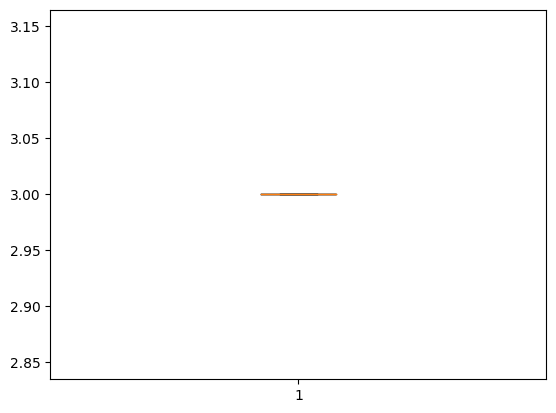

In [10]:
print(f"ER graph statistics")
gr.calculate_statistics_parameters(calculate_girths(er_graphs))

SF graph statistics
mean is 3.0
standard deviation is 0.0
CI is (3.0, 3.0)


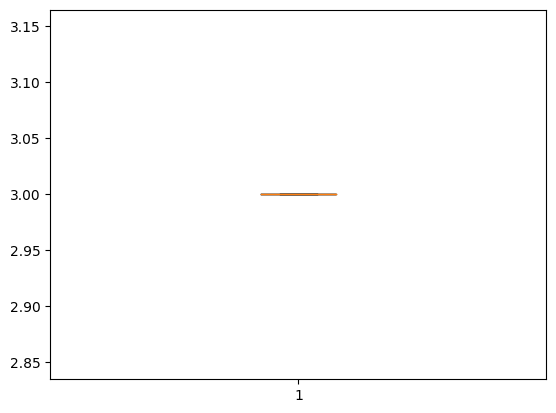

In [11]:
print(f"SF graph statistics")
gr.calculate_statistics_parameters(calculate_girths(sf_graphs))

WA graph statistics
mean is 3.0
standard deviation is 0.0
CI is (3.0, 3.0)


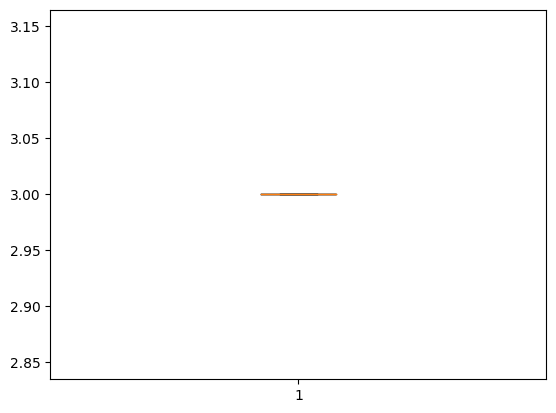

In [12]:
print(f"WA graph statistics")
gr.calculate_statistics_parameters(calculate_girths(wa_graphs))

RSRBG graph statistics
mean is 4.0
standard deviation is 0.0
CI is (4.0, 4.0)


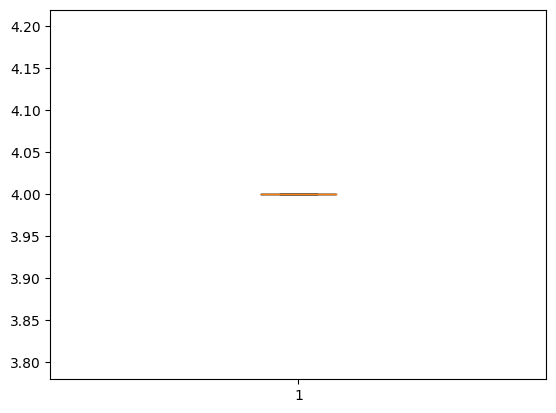

In [14]:
print(f"RSRBG graph statistics")
gr.calculate_statistics_parameters(calculate_girths(rsrbg_graphs, base=1))

RSRG graph statistics
mean is 3.0
standard deviation is 0.0
CI is (3.0, 3.0)


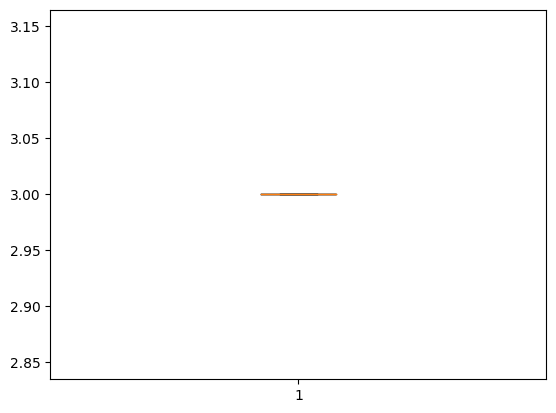

In [15]:
print(f"RSRG graph statistics")
gr.calculate_statistics_parameters(calculate_girths(rsrg_graphs, base=1))

complete graph have least girth and cycle graph have most girth

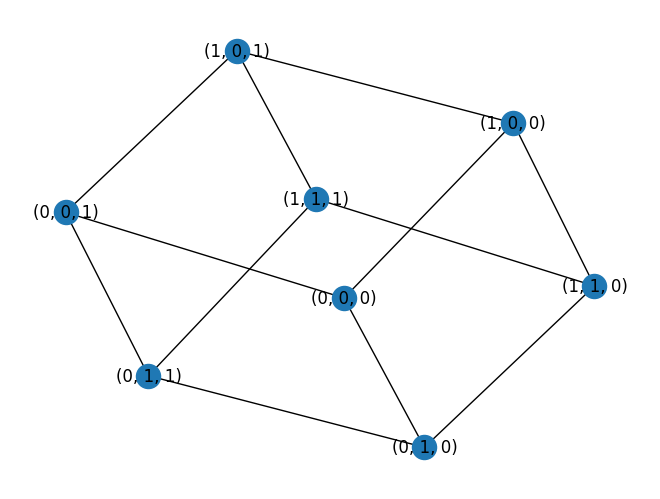

In [16]:
G = nx.hypercube_graph(3)
nx.draw(G, with_labels=True)
plt.show()

In [17]:
mapping = {}

for i in range(0, 8):
    mapping[list(G.nodes)[i]] = i
    mapping[i] = list(G.nodes)[i]


girth(G, mapping=mapping)

4

# Compare Cube, RSRG, RSRBG graphs

In [18]:
# initial parameters
number_of_simulation = 1000
n = 8
d1 = 2
d2 = 6
p = 1
d = 3

In [20]:
# create a dataset of cube, rsrg, rsrbg graphs
cube_graphs = []
rsrg_graphs = []
rsrbg_graphs = []
for i in range(number_of_simulation):
    mapping = {}

    for i in range(0, 8):
        G = nx.hypercube_graph(d)
        mapping[list(G.nodes)[i]] = i
        mapping[i] = list(G.nodes)[i]
        
    cube_graphs.append((G, mapping))
                       
    rsrg_graphs.append(gr.RSRG(p, n, d1, d2)[0])
    rsrbg_graphs.append(gr.RSRBG(n, d1, d2)[0])   

cube graph girth statistics
mean is 4.0
standard deviation is 0.0
CI is (4.0, 4.0)


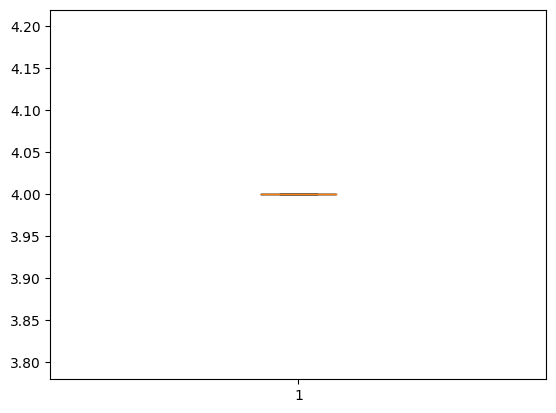

In [21]:
print(f"cube graph girth statistics")
gr.calculate_statistics_parameters(calculate_girths(cube_graphs, mapping=1))

RSRG graph girth statistics
mean is 3.018
standard deviation is 0.132951118836962
CI is (3.0097596042813466, 3.026240395718653)


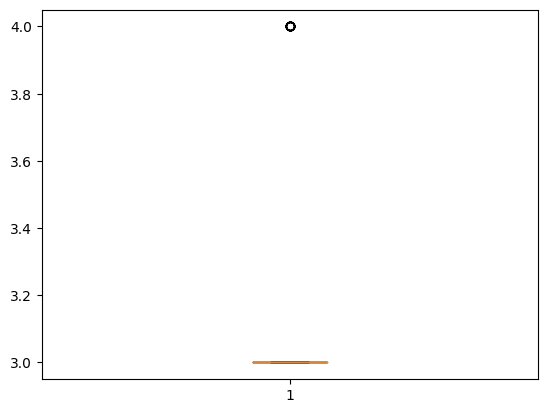

In [22]:
print(f"RSRG graph girth statistics")
gr.calculate_statistics_parameters(calculate_girths(rsrg_graphs, 1))

RSRBG graph girth statistics
mean is 4.0
standard deviation is 0.0
CI is (4.0, 4.0)


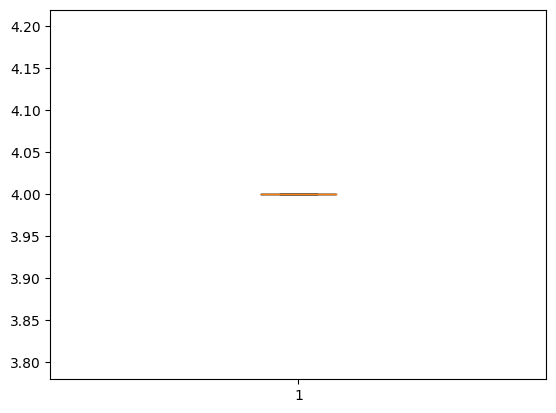

In [23]:
print(f"RSRBG graph girth statistics")

gr.calculate_statistics_parameters(calculate_girths(rsrbg_graphs, 1))